In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import plotly.graph_objects as go

from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


In [0]:
train = pd.read_csv("/content/drive/My Drive/PROJECTS/DSL/Kaggle/train.csv")
test = pd.read_csv("/content/drive/My Drive/PROJECTS/DSL/Kaggle/test.csv")
region = pd.read_csv("/content/drive/My Drive/PROJECTS/DSL/Kaggle/regions.csv")

In [11]:
train.shape, test.shape, region.shape

((18403, 9), (7886, 8), (9, 2))

In [12]:
train.head(20)

,Id,region,date,mortality_rate,O3,PM10,PM25,NO2,T2M
0,1,E12000001,2007-01-02,2.264,42.358,9.021,NaN,NaN,278.138
1,2,E12000001,2007-01-03,2.030,49.506,5.256,NaN,NaN,281.745
2,3,E12000001,2007-01-04,1.874,51.101,4.946,NaN,NaN,280.523
3,4,E12000001,2007-01-05,2.069,47.478,6.823,NaN,NaN,280.421
4,5,E12000001,2007-01-06,1.913,45.226,7.532,NaN,NaN,278.961
5,6,E12000001,2007-01-07,1.756,53.226,5.607,NaN,NaN,281.504
6,7,E12000001,2007-01-08,1.756,48.177,4.674,NaN,NaN,279.519
7,8,E12000001,2007-01-09,2.147,56.917,5.979,NaN,NaN,281.866
8,9,E12000001,2007-01-10,2.186,45.757,3.433,NaN,NaN,278.044
9,10,E12000001,2007-01-11,1.249,56.388,6.159,NaN,NaN,280.358


In [13]:
test.head()

,Id,region,date,O3,PM10,PM25,NO2,T2M
0,18404,E12000006,2012-05-28,75.980,20.876,19.123,9.713,290.787
1,18405,E12000006,2012-05-29,73.084,21.660,17.794,8.417,288.474
2,18406,E12000006,2012-05-30,59.350,21.925,17.699,10.878,289.889
3,18407,E12000006,2012-05-31,45.991,14.549,11.386,10.302,287.815
4,18408,E12000006,2012-06-01,52.210,11.208,9.545,8.598,287.627


In [14]:
region.head()

,Code,Region
0,E12000001,North East
1,E12000002,North West
2,E12000003,Yorkshire and The Humber
3,E12000004,East Midlands
4,E12000005,West Midlands


In [15]:
type(train)

pandas.core.frame.DataFrame

In [16]:
train.isna().sum()

Id                   0
region               0
date                 0
mortality_rate       0
O3                   9
PM10                 9
PM25              3276
NO2               6570
T2M                  0
dtype: int64

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18403 entries, 0 to 18402
Data columns (total 9 columns):
Id                18403 non-null int64
region            18403 non-null object
date              18403 non-null object
mortality_rate    18403 non-null float64
O3                18394 non-null float64
PM10              18394 non-null float64
PM25              15127 non-null float64
NO2               11833 non-null float64
T2M               18403 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


## univariate analysis ##

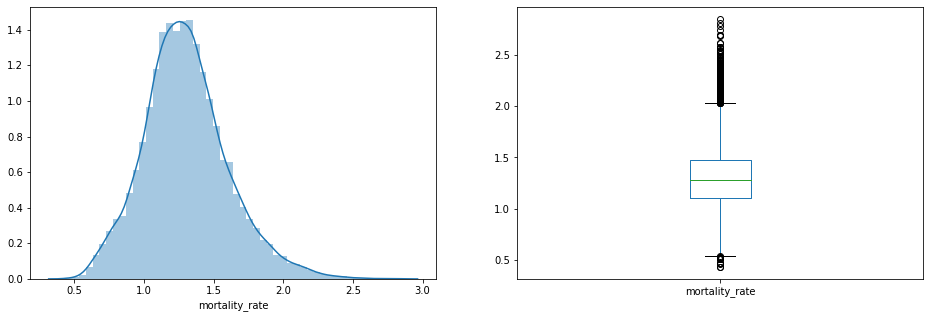

In [18]:
# Visualizing mortality_rate
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['mortality_rate']);

plt.subplot(122)
train['mortality_rate'].plot.box(figsize=(16,5))

plt.show()


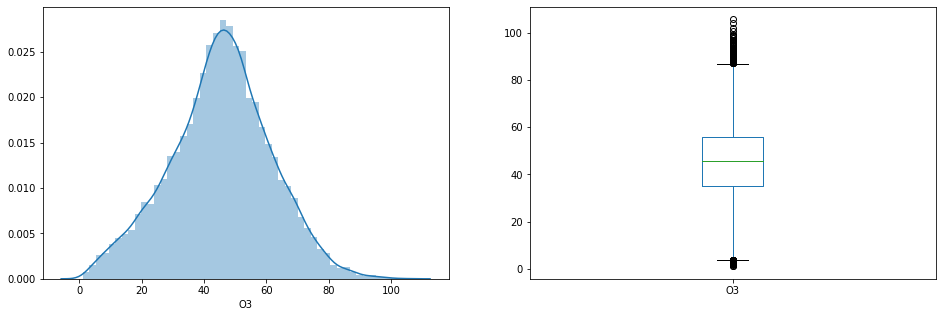

In [19]:
# Visualizing O3
# plt.figure(1)
plt.subplot(121)
O3_1 = train['O3'].dropna()
sns.distplot(O3_1);

plt.subplot(122)
O3_1.plot.box(figsize=(16,5))

plt.show()


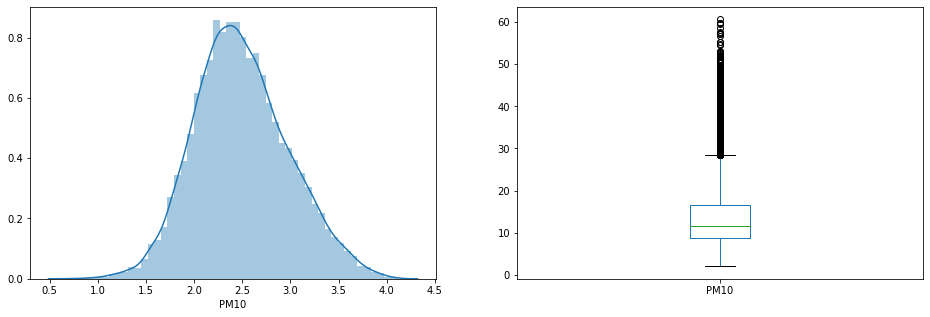

In [21]:
# Visualizing PM10
# plt.figure(1)
plt.subplot(121)
PM10_1 = train['PM10'].dropna()
sns.distplot(PM10_1);

plt.subplot(122)
PM10_1.plot.box(figsize=(16,5))

plt.show()


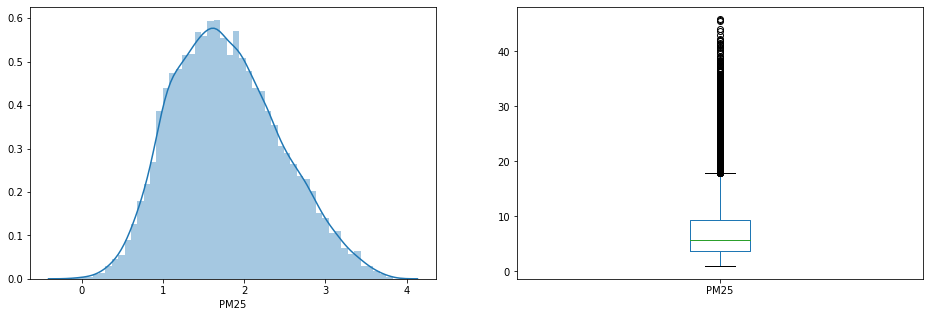

In [23]:
# Visualizing PM25
# plt.figure(1)
plt.subplot(121)
PM25_1 = train['PM25'].dropna()
sns.distplot(PM25_1);

plt.subplot(122)
PM25_1.plot.box(figsize=(16,5))

plt.show()


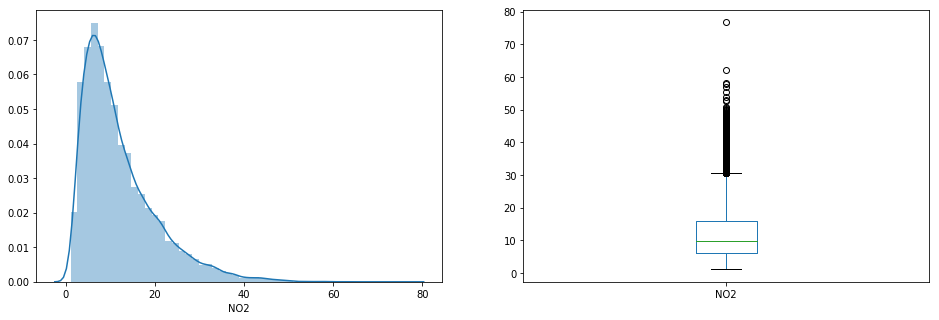

In [0]:
# Visualizing NO2
# plt.figure(1)
plt.subplot(121)
NO2_1 = train['NO2'].dropna()
sns.distplot(NO2_1);

plt.subplot(122)
NO2_1.plot.box(figsize=(16,5))

plt.show()


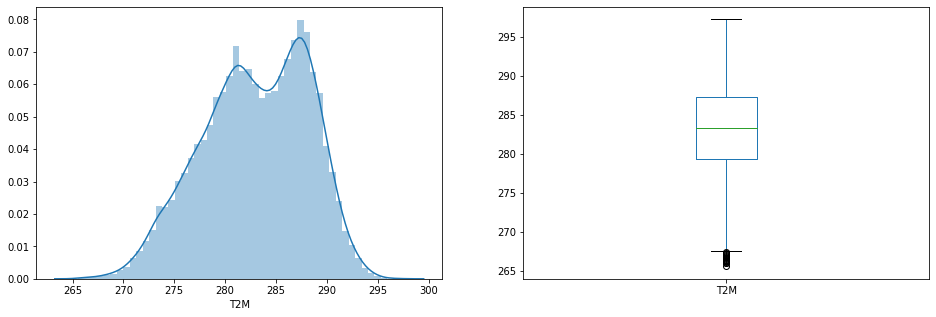

In [25]:
# Visualizing T2M
# plt.figure(1)
plt.subplot(121)
sns.distplot(train['T2M']);

plt.subplot(122)
train['T2M'].plot.box(figsize=(16,5))

plt.show()


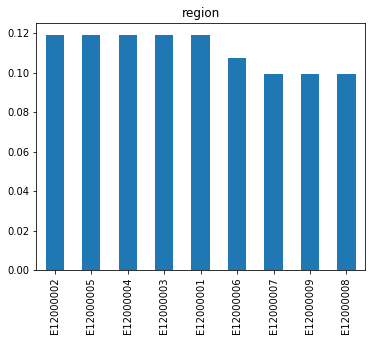

In [0]:
# Visualizing categorical features
# plt.figure(1)
plt.subplot(231)
train['region'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'region')

In [0]:
train.columns, region.columns

(Index(['Id', 'region', 'date', 'mortality_rate', 'O3', 'PM10', 'PM25', 'NO2',
        'T2M'],
       dtype='object'), Index(['Code', 'Region'], dtype='object'))

In [0]:
train1 = train.merge(region, left_on='region', right_on='Code')

In [0]:
train1.groupby("region")["Region"].unique()

region
E12000001                  [North East]
E12000002                  [North West]
E12000003    [Yorkshire and The Humber]
E12000004               [East Midlands]
E12000005               [West Midlands]
E12000006             [East of England]
E12000007                      [London]
E12000008                  [South East]
E12000009                  [South West]
Name: Region, dtype: object

In [0]:
region

,Code,Region
0,E12000001,North East
1,E12000002,North West
2,E12000003,Yorkshire and The Humber
3,E12000004,East Midlands
4,E12000005,West Midlands
5,E12000006,East of England
6,E12000007,London
7,E12000008,South East
8,E12000009,South West


# Bivariate analysis #

### variation with date - time series plot ##

In [0]:
train.columns

Index(['Id', 'region', 'date', 'mortality_rate', 'O3', 'PM10', 'PM25', 'NO2',
       'T2M'],
      dtype='object')

In [0]:
train["date"] = pd.to_datetime(train['date'])

In [0]:
train.head(30)

,Id,region,date,mortality_rate,O3,PM10,PM25,NO2,T2M
0,1,E12000001,2007-01-02,2.264,42.358,9.021,NaN,NaN,278.138
1,2,E12000001,2007-01-03,2.030,49.506,5.256,NaN,NaN,281.745
2,3,E12000001,2007-01-04,1.874,51.101,4.946,NaN,NaN,280.523
3,4,E12000001,2007-01-05,2.069,47.478,6.823,NaN,NaN,280.421
4,5,E12000001,2007-01-06,1.913,45.226,7.532,NaN,NaN,278.961
5,6,E12000001,2007-01-07,1.756,53.226,5.607,NaN,NaN,281.504
6,7,E12000001,2007-01-08,1.756,48.177,4.674,NaN,NaN,279.519
7,8,E12000001,2007-01-09,2.147,56.917,5.979,NaN,NaN,281.866
8,9,E12000001,2007-01-10,2.186,45.757,3.433,NaN,NaN,278.044
9,10,E12000001,2007-01-11,1.249,56.388,6.159,NaN,NaN,280.358


In [0]:
train_r1 = train[train["region"]=="E12000001"]
fig1 = px.line(train_r1, x='date', y='mortality_rate')
fig1.show()

In [0]:
fig2 = go.Figure([go.Scatter(x=train_r1['date'], y=train_r1['mortality_rate'])])
#fig2.show()

fig2.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)

In [0]:
fig3 = go.Figure([go.Scatter(x=train_r1['date'], y=train_r1["O3"])])
#fig2.show()

fig3.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)

In [0]:
fig2 = go.Figure([go.Scatter(x=train_r1['date'], y=train_r1["PM10"])])
#fig2.show()

fig2.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)

In [0]:
fig4 = go.Figure([go.Scatter(x=train_r1['date'], y=train_r1["PM25"])])
#fig2.show()

fig4.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)

In [0]:
fig5 = go.Figure([go.Scatter(x=train_r1['date'], y=train_r1["NO2"])])
#fig2.show()

fig5.update_layout(title_text='Time Series with Rangeslider',
                  xaxis_rangeslider_visible=True)

### scatter plot of PM25 with other varibles ###

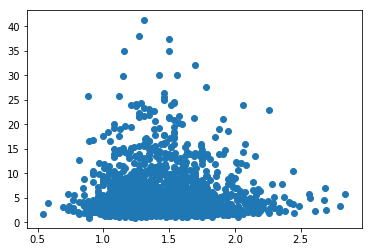

In [0]:
plt.scatter(x=train_r1['mortality_rate'], y=train_r1["PM25"])

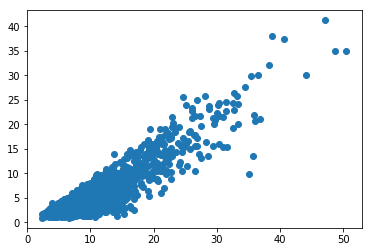

In [0]:
plt.scatter(x=train_r1['PM10'], y=train_r1["PM25"])

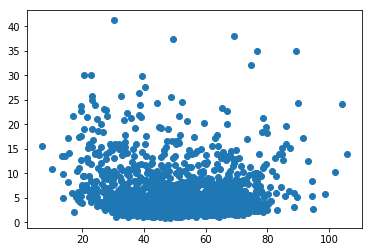

In [0]:
plt.scatter(x=train_r1['O3'], y=train_r1["PM25"])

In [0]:
train.columns

Index(['Id', 'region', 'date', 'mortality_rate', 'O3', 'PM10', 'PM25', 'NO2',
       'T2M'],
      dtype='object')

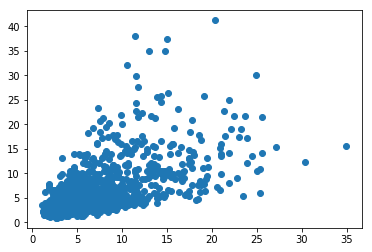

In [0]:
plt.scatter(x=train_r1['NO2'], y=train_r1["PM25"])

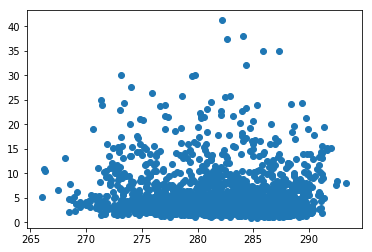

In [0]:
plt.scatter(x=train_r1['T2M'], y=train_r1["PM25"])

### scatter plot of NO2 with other varibales ###

In [0]:
train.columns

Index(['Id', 'region', 'date', 'mortality_rate', 'O3', 'PM10', 'PM25', 'NO2',
       'T2M'],
      dtype='object')

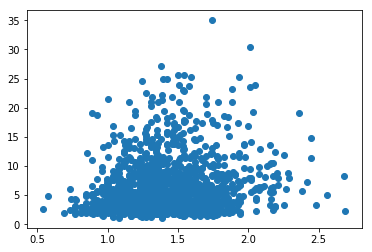

In [0]:
plt.scatter(x=train_r1['mortality_rate'], y=train_r1["NO2"])

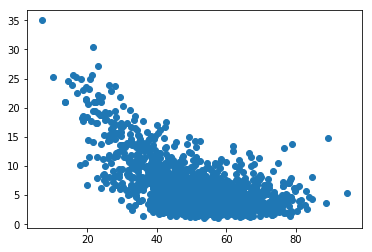

In [0]:
plt.scatter(x=train_r1['O3'], y=train_r1["NO2"])

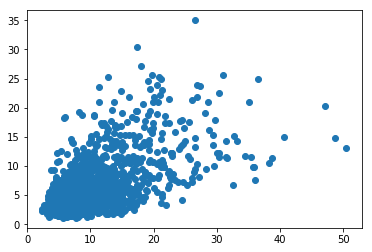

In [0]:
plt.scatter(x=train_r1['PM10'], y=train_r1["NO2"])

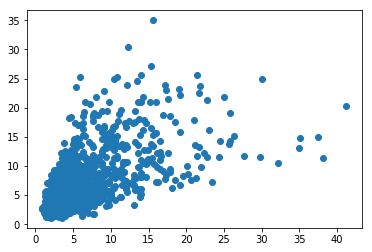

In [0]:
plt.scatter(x=train_r1['PM25'], y=train_r1["NO2"])

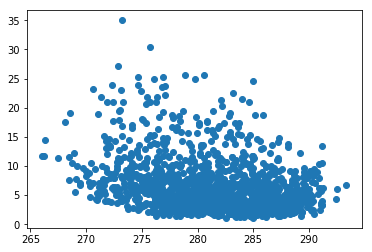

In [0]:
plt.scatter(x=train_r1['T2M'], y=train_r1["NO2"])

## Time series handling ##

In [0]:
train_r1.columns

Index(['Id', 'region', 'date', 'mortality_rate', 'O3', 'PM10', 'PM25', 'NO2',
       'T2M'],
      dtype='object')

In [0]:
train_r1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 0 to 16790
Data columns (total 9 columns):
Id                2191 non-null int64
region            2191 non-null object
date              2191 non-null datetime64[ns]
mortality_rate    2191 non-null float64
O3                2190 non-null float64
PM10              2190 non-null float64
PM25              1827 non-null float64
NO2               1461 non-null float64
T2M               2191 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 171.2+ KB


In [0]:
train_r1_1 = train_r1.set_index('date')

In [0]:
train_r1_1.head()

,Id,region,mortality_rate,O3,PM10,PM25,NO2,T2M
date,,,,,,,,
2007-01-02,1,E12000001,2.264,42.358,9.021,NaN,NaN,278.138
2007-01-03,2,E12000001,2.030,49.506,5.256,NaN,NaN,281.745
2007-01-04,3,E12000001,1.874,51.101,4.946,NaN,NaN,280.523
2007-01-05,4,E12000001,2.069,47.478,6.823,NaN,NaN,280.421
2007-01-06,5,E12000001,1.913,45.226,7.532,NaN,NaN,278.961


In [0]:
NO2_series = train_r1_1["NO2"]

In [0]:
NO2_series.head()

date
2009-01-01     7.882
2009-01-02    11.312
2009-01-03     6.419
2009-01-04     4.946
2009-01-05     8.263
Name: NO2, dtype: float64

In [0]:
NO2_series = NO2_series.dropna()

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


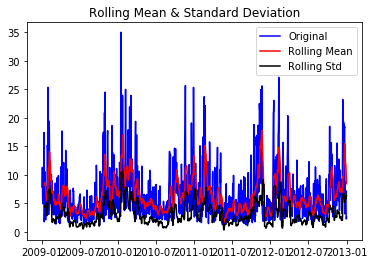

Results of Dickey-Fuller Test:
Test Statistic                   -4.988933
p-value                           0.000023
#Lags Used                       23.000000
Number of Observations Used    1437.000000
Critical Value (1%)              -3.434909
Critical Value (5%)              -2.863553
Critical Value (10%)             -2.567842
dtype: float64


In [0]:
test_stationarity(NO2_series)

In [0]:
NO2_series.isna().sum()

0

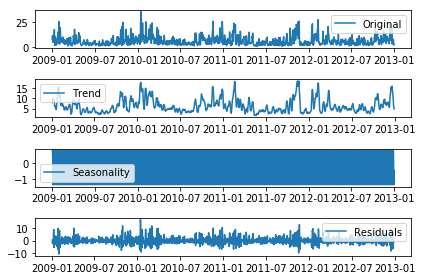

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(NO2_series)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(NO2_series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


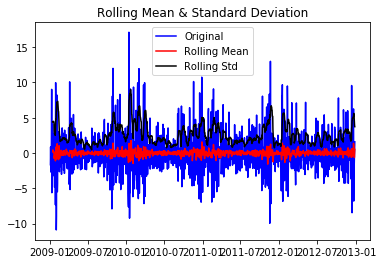

Results of Dickey-Fuller Test:
Test Statistic                -1.563181e+01
p-value                        1.681781e-28
#Lags Used                     2.400000e+01
Number of Observations Used    1.430000e+03
Critical Value (1%)           -3.434931e+00
Critical Value (5%)           -2.863563e+00
Critical Value (10%)          -2.567847e+00
dtype: float64


In [0]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [0]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

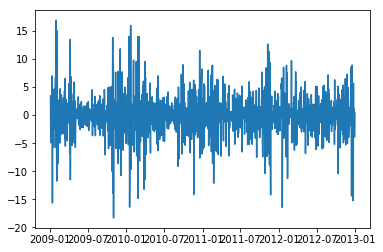

In [0]:
ts_log_diff = NO2_series - NO2_series.shift()
plt.plot(ts_log_diff)

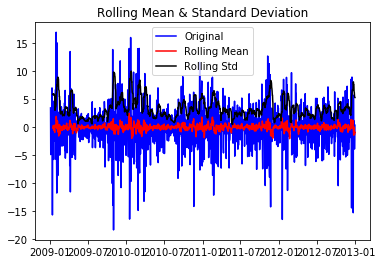

Results of Dickey-Fuller Test:
Test Statistic                -1.225712e+01
p-value                        9.255810e-23
#Lags Used                     2.300000e+01
Number of Observations Used    1.436000e+03
Critical Value (1%)           -3.434912e+00
Critical Value (5%)           -2.863555e+00
Critical Value (10%)          -2.567843e+00
dtype: float64


In [0]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [0]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

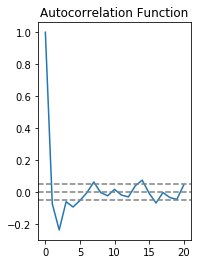

In [0]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

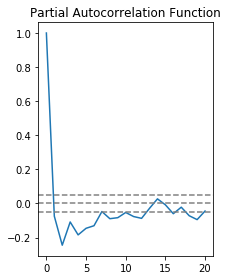

In [0]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [0]:
from statsmodels.tsa.arima_model import ARIMA

Text(0.5, 1.0, 'RSS: 15987.7324')

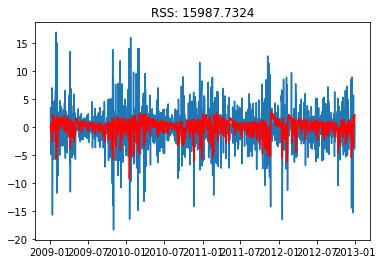

In [0]:
model = ARIMA(NO2_series, order=(1, 1, 1))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

In [0]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [0]:
p = d = q = range(0, 2)
#p = q = range(0, 2)
#d = [2,7]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [0]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(NO2_series,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:10153.3881676087
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:9525.562149322792
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:9225.791446372446
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:8502.87852626952
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:9016.468205580459
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:8592.038101836552
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:8810.813857843597
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:8462.987889301725
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:8903.821317281278
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8517.903543772623
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8598.383255798077
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:7745.8391728763245
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:8285.219861546528
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:7821.999583969955
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:8154.592814405702
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:7738.251196526409
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:7884.869697979293
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:7802.287750335854
ARIMA(0, 1,